# Stroke Prediction using Machine Learning Algorithms

# Data Analysis and ML Model Creation

## Importing all the necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize']=(15,5)

## Creating the dataframe

In [2]:
data=pd.read_csv(r'F:\rishabh\8th sem\MAJOR PROJECT\Codes\dataset\healthcare-dataset-stroke-data.csv')

In [3]:
data 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Exploratory Data Analysis

In [4]:
data.shape

(5110, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Fiiling Null values

In [7]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [9]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [10]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [11]:
data['bmi']

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [12]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Feature Selection

In [13]:
data=data.drop('id',axis=1)

In [14]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


## Outlier Removation

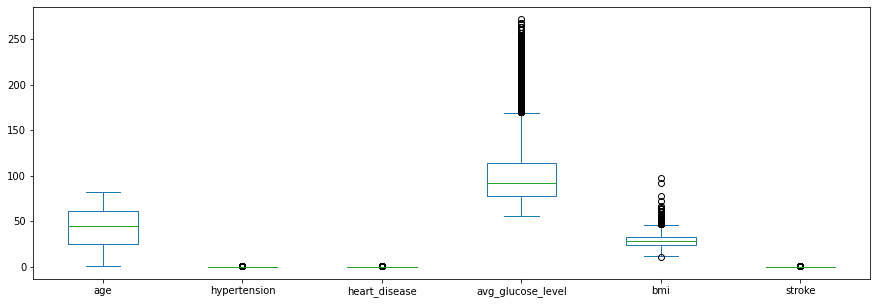

In [15]:
data.plot(kind='box')
plt.show()

In [16]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [17]:
data[data["avg_glucose_level"] > 114.090000]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5071,Male,81.0,0,0,Yes,Private,Rural,135.32,35.800000,Unknown,0
5076,Female,34.0,0,0,Yes,Private,Rural,174.37,23.000000,never smoked,0
5086,Female,51.0,0,0,Yes,Private,Urban,152.56,21.800000,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0


## Label Encoding to categorical variables

In [18]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [19]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [21]:
gender = enc.fit_transform(data['gender'])

In [22]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [23]:
smoking_status = enc.fit_transform(data['smoking_status'])

In [24]:
smoking_status

array([1, 2, 2, ..., 2, 1, 0])

In [25]:
work_type = enc.fit_transform(data['work_type'])
Residence_type = enc.fit_transform(data['Residence_type'])
ever_married = enc.fit_transform(data['ever_married'])

## Assigning the labelled data to the respective columns of the dataframe

In [26]:
data['work_type']=work_type

In [27]:
data["ever_married"]=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender

In [28]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


## Splitting the Data for Train and Test

In [30]:
X=data.drop('stroke',axis=1)

In [31]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [32]:
Y=data['stroke']

In [33]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=None)

In [35]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4929,1,0.72,0,0,0,4,1,80.08,16.4,0
2637,1,78.00,0,1,1,3,1,169.43,23.5,1
2213,0,18.00,0,0,0,2,0,135.19,23.4,2
4229,0,27.00,0,0,0,2,1,61.80,26.8,1
1255,1,22.00,0,0,0,0,0,94.33,23.1,2
...,...,...,...,...,...,...,...,...,...,...
4644,1,32.00,0,0,1,2,1,97.95,40.2,3
2456,0,60.00,1,0,0,2,1,96.00,44.5,3
3829,1,6.00,0,0,0,4,1,90.60,16.6,0
3862,0,54.00,0,0,1,2,0,68.60,44.8,3


In [36]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2274,1,22.00,0,0,1,0,1,131.30,27.000000,2
4001,1,1.88,0,0,0,4,0,68.35,19.100000,0
3940,1,8.00,0,0,0,4,1,78.76,28.893237,0
4973,1,65.00,0,0,1,2,1,81.06,30.100000,3
2580,1,39.00,0,0,1,2,0,121.32,26.800000,2
...,...,...,...,...,...,...,...,...,...,...
1020,0,20.00,0,0,0,2,1,100.81,26.800000,0
2498,0,15.00,0,0,0,4,0,101.15,22.200000,0
4711,1,79.00,0,0,1,3,1,242.62,25.500000,2
5035,0,78.00,0,0,1,2,1,203.36,28.700000,1


In [37]:
Y_train

4929    0
2637    0
2213    0
4229    0
1255    0
       ..
4644    0
2456    0
3829    0
3862    0
5080    0
Name: stroke, Length: 4088, dtype: int64

In [38]:
Y_test

2274    0
4001    0
3940    0
4973    0
2580    0
       ..
1020    0
2498    0
4711    0
5035    0
469     0
Name: stroke, Length: 1022, dtype: int64

## Normalizing and Saving Scaler Object

In [39]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


### Normalizing

In [40]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [41]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

### Saving the Scaler Object

In [42]:
import pickle
import os

In [43]:
scalar_path=os.path.join(r'F:\rishabh\8th sem\MAJOR PROJECT\Codes\models\scaler.pkl')
with open (scalar_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [44]:
X_train_std

array([[ 1.17807065, -1.87629973, -0.33206349, ..., -0.58280932,
        -1.6158983 , -1.28444125],
       [ 1.17807065,  1.55044547, -0.33206349, ...,  1.37902499,
        -0.70292164, -0.35162977],
       [-0.84884552, -1.11007099, -0.33206349, ...,  0.62722637,
        -0.71578047,  0.58118171],
       ...,
       [ 1.17807065, -1.64217429, -0.33206349, ..., -0.35182446,
        -1.59018065, -1.28444125],
       [-0.84884552,  0.48623889, -0.33206349, ..., -0.83487264,
         2.03600832,  1.5139932 ],
       [-0.84884552, -0.62230964, -0.33206349, ..., -0.353581  ,
        -0.12427447,  0.58118171]])

In [45]:
X_test_std

array([[ 1.17807065, -0.93270323, -0.33206349, ...,  0.54181467,
        -0.25286273,  0.58118171],
       [ 1.17807065, -1.82486308, -0.33206349, ..., -0.84036182,
        -1.26870999, -1.28444125],
       [ 1.17807065, -1.5534904 , -0.33206349, ..., -0.61179221,
        -0.00941469, -1.28444125],
       ...,
       [ 1.17807065,  1.59478742, -0.33206349, ...,  2.98603846,
        -0.44574512,  0.58118171],
       [-0.84884552,  1.55044547, -0.33206349, ...,  2.12401703,
        -0.03426268, -0.35162977],
       [ 1.17807065,  1.10702606, -0.33206349, ..., -0.31647411,
        -0.21428625, -1.28444125]])

In [46]:
data.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026109,-0.062581,0.008929
age,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.325942,0.265199,0.245257
hypertension,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.160189,0.111038,0.127904
heart_disease,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.038899,0.048460,0.134914
ever_married,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.335705,0.259647,0.108340
work_type,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299448,-0.305927,-0.032316
Residence_type,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000120,0.008237,0.015458
avg_glucose_level,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.168751,0.063437,0.131945
bmi,-0.026109,0.325942,0.160189,0.038899,0.335705,-0.299448,-0.000120,0.168751,1.000000,0.219148,0.038947
smoking_status,-0.062581,0.265199,0.111038,0.048460,0.259647,-0.305927,0.008237,0.063437,0.219148,1.000000,0.028123


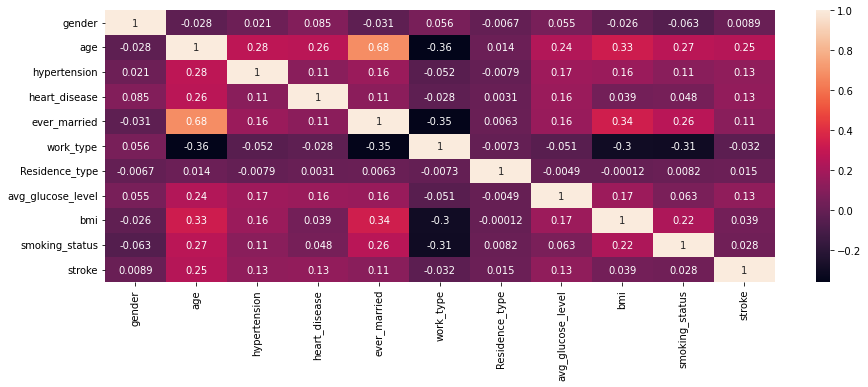

In [47]:
#ploting the heatmap for correlation
ax = sns.heatmap(data.corr(), annot=True)
plt.savefig("correlation.png")

## ML Model Training using various ML Algorithms

### 1. Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [49]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [50]:
dt.feature_importances_

array([0.02593051, 0.24027383, 0.03145708, 0.01568126, 0.01144511,
       0.02831435, 0.03403483, 0.27297078, 0.25987554, 0.0800167 ])

In [51]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [52]:
Y_pred=dt.predict(X_test_std)

In [53]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
Y_pred = dt.predict(X_test_std)

In [55]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
Y_test

2274    0
4001    0
3940    0
4973    0
2580    0
       ..
1020    0
2498    0
4711    0
5035    0
469     0
Name: stroke, Length: 1022, dtype: int64

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
ac_dt=accuracy_score(Y_test,Y_pred)

In [59]:
ac_dt

0.910958904109589

### 2. Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [61]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [62]:
Y_pred=lr.predict(X_test_std)

In [63]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
Y_test

2274    0
4001    0
3940    0
4973    0
2580    0
       ..
1020    0
2498    0
4711    0
5035    0
469     0
Name: stroke, Length: 1022, dtype: int64

In [65]:
ac_lr=accuracy_score(Y_test,Y_pred)

In [66]:
ac_lr

0.9471624266144814

### 3. KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [68]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [69]:
Y_pred=knn.predict(X_test_std)

In [70]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
Y_test

2274    0
4001    0
3940    0
4973    0
2580    0
       ..
1020    0
2498    0
4711    0
5035    0
469     0
Name: stroke, Length: 1022, dtype: int64

In [72]:
ac_knn=accuracy_score(Y_test,Y_pred)

In [73]:
ac_knn

0.9422700587084148

### 4. Random Forest 

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [75]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [76]:
rf.feature_importances_

array([0.03104219, 0.23422857, 0.02292473, 0.02148043, 0.01899875,
       0.04641319, 0.03438075, 0.28904369, 0.23141753, 0.07007017])

In [77]:
Y_pred=rf.predict(X_test_std)

In [78]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
Y_test

2274    0
4001    0
3940    0
4973    0
2580    0
       ..
1020    0
2498    0
4711    0
5035    0
469     0
Name: stroke, Length: 1022, dtype: int64

In [80]:
Y_pred_prob = rf.predict_proba(X_test_std)

In [81]:
Y_pred_prob

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.8 , 0.2 ],
       [0.72, 0.28],
       [0.8 , 0.2 ]])

In [82]:
ac_rf=accuracy_score(Y_test,Y_pred)

In [83]:
ac_rf

0.9471624266144814

## 5. Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
nb = GaussianNB()

In [86]:
nb.fit(X_train_std, Y_train)

GaussianNB()

In [87]:
Y_pred=nb.predict(X_test_std)

In [88]:
Y_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [89]:
Y_test

2274    0
4001    0
3940    0
4973    0
2580    0
       ..
1020    0
2498    0
4711    0
5035    0
469     0
Name: stroke, Length: 1022, dtype: int64

In [90]:
Y_pred_prob = nb.predict_proba(X_test_std)

In [91]:
Y_pred_prob

array([[9.99965272e-01, 3.47277900e-05],
       [1.00000000e+00, 5.37794549e-11],
       [9.99999998e-01, 1.54159267e-09],
       ...,
       [2.21850013e-01, 7.78149987e-01],
       [4.51354101e-01, 5.48645899e-01],
       [9.34162542e-01, 6.58374578e-02]])

In [92]:
ac_nb=accuracy_score(Y_test,Y_pred)

In [93]:
ac_nb

0.863013698630137

In [94]:
ac_dt,ac_lr,ac_knn,ac_rf,ac_nb

(0.910958904109589,
 0.9471624266144814,
 0.9422700587084148,
 0.9471624266144814,
 0.863013698630137)

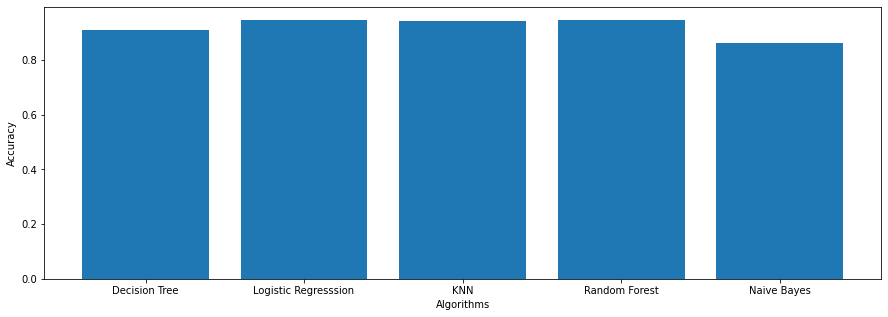

In [95]:
plt.bar(['Decision Tree','Logistic Regresssion','KNN','Random Forest','Naive Bayes'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_nb])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

## Model Creation

In [97]:
# import joblib
# model_path = os.path.join(r'F:\rishabh\8th sem\MAJOR PROJECT\Codes\models\rf.sav')
# joblib.dump(rf,model_path)

## Testing

In [98]:
a = int(input("Enter your Gender (Press 0 for Female and 1 for Male)\n"))
b = float(input("Enter your Age:\n"))
c = int(input("Do you have hypertension? (Press 0 for No and 1 for Yes)\n"))
d = int(input("Do you have heart disease? (Press 0 for No and 1 for Yes)\n"))
e = int(input("Have you ever been married? (Press 0 for No and 1 for Yes)\n"))
f = int(input("Enter your Job Type: (Press 0 for Government Job, 1 for never worked, 2 for private job, 3 for Self-Emplyment, and 4 for Children)\n"))
g = int(input("Enter your Residence Type:  (Press 0 for Rural and 1 for Urban)\n"))
h = float(input("Enter your Average Blood Sugar Level:\n"))
i = float(input("Enter your Body Mass Index (BMI) value:\n"))
j = int(input("Have you ever smoked? (Press 0 for Not Known, 1 for formally smoked, 2 for never smoked, 3 for Still Smokes )\n"))

Enter your Gender (Press 0 for Female and 1 for Male)
1
Enter your Age:
79
Do you have hypertension? (Press 0 for No and 1 for Yes)
1
Do you have heart disease? (Press 0 for No and 1 for Yes)
0
Have you ever been married? (Press 0 for No and 1 for Yes)
1
Enter your Job Type: (Press 0 for Government Job, 1 for never worked, 2 for private job, 3 for Self-Emplyment, and 4 for Children)
2
Enter your Residence Type:  (Press 0 for Rural and 1 for Urban)
1
Enter your Average Blood Sugar Level:
225
Enter your Body Mass Index (BMI) value:
42.78
Have you ever smoked? (Press 0 for Not Known, 1 for formally smoked, 2 for never smoked, 3 for Still Smokes )
3


In [99]:
df = pd.DataFrame({'gender':[a], 'age': [b], 'hypertension': [c], 'heart_disease': [d], 'ever_married': [e], 'work_type': [f], 'Residence_type': [g],
                  'avg_glucose_level': [h], 'bmi': [i], 'smoking_status': [j]})

In [100]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,79.0,1,0,1,2,1,225.0,42.78,3


In [101]:
df_std=std.transform(df)

In [102]:
df_std

array([[ 1.17807065,  1.59478742,  3.01147232, -0.234452  ,  0.72090402,
        -0.15611263,  0.98446507,  2.59916078,  1.77626004,  1.5139932 ]])

In [103]:
Y_pred_test = rf.predict(df_std)

In [104]:
Y_pred_test

array([0], dtype=int64)

In [105]:
Y_pred_test_prob = rf.predict_proba(df_std)

In [106]:
Y_pred_test_prob

array([[0.85, 0.15]])

In [107]:
a = Y_pred_test_prob[0][1]*100

In [108]:
a

15.0

In [109]:
if int(Y_pred_test) == 0:
    print(f"Don't Worry you are safe! You have stroke chances of only {int(a)}%.")
else:
    print(f"You have been diagonised with stroke risk!! You have stroke chances of {int(a)}%.")

Don't Worry you are safe! You have stroke chances of only 15%.
